- Loading the training and testing instances from the dump

In [1]:
import pickle


picklefile_tX = open('../dump/training_features.pickle', 'rb')
training_features = pickle.load(picklefile_tX)
picklefile_tY = open('../dump/training_labels.pickle', 'rb')
training_labels = pickle.load(picklefile_tY)

picklefile_TX = open('../dump/testing_features.pickle', 'rb')
testing_features = pickle.load(picklefile_TX)
picklefile_TY = open('../dump/testing_labels.pickle', 'rb')
testing_labels = pickle.load(picklefile_TY)


picklefile_tX.close()
picklefile_tY.close()
picklefile_TX.close()
picklefile_TY.close()

- Using logsitic regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

LRegression = LogisticRegression().fit(training_features, training_labels)

prediction_LRegression = LRegression.predict(testing_features)

print(np.unique(prediction_LRegression))

acc_log_reg = accuracy_score(prediction_LRegression, testing_labels) * 100

print("Accuracy:", acc_log_reg)

[0. 1.]
Accuracy: 73.17073170731707


C:\Users\Shad Humydee\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


- Using Random Forest Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


RF_classifier = RandomForestClassifier(n_estimators=20, random_state=0)
RF_classifier.fit(training_features, training_labels)
y_pred = RF_classifier.predict(testing_features)

print(np.unique(y_pred))

acc_rf_classifier = (1 - metrics.mean_absolute_error(testing_labels, y_pred)) * 100

print('Accuracy:', acc_rf_classifier*100)

[0. 1.]
Accuracy: 9756.09756097561


C:\Users\Shad Humydee\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


- Using XGBoost Classifier

In [4]:
from xgboost import XGBClassifier

model = XGBClassifier()

# print(model)

model.fit(training_features, training_labels)

y_pred = model.predict(testing_features)
predictions = [round(value) for value in y_pred]

# print(predictions)
# print(testing_labels)

# evaluate predictions
acc_XGB_classifier = accuracy_score(testing_labels, predictions) * 100
print("Accuracy: %.2f%%" % (acc_XGB_classifier))

C:\Users\Shad Humydee\anaconda3\envs\py36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Shad Humydee\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:40:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 100.00%


- Using Neural Networks

In [5]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.python.keras.layers import Dropout
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import time


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(64, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(32, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(16, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(8, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(4, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'he_uniform', activation='sigmoid'))

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

# Compiling the ANN
classifier.compile(loss='BinaryCrossentropy', optimizer='SGD', metrics=['accuracy'])


"""
#######################################################
                TENSORBOARD - Starts
#######################################################
"""

tensorboard = TensorBoard(log_dir='../logs/{}'.format(int(time.time())))


# basic_model.save \
#     ('C:/Users/shad_/Desktop/2. Fall 2020/CSE 6211 (Deep Learning)/Submission/Project/Covid Detection with UNet/models/basic_model')

"""
#######################################################
                TENSORBOARD - Ends
#######################################################
"""

# Fitting the ANN to the Training set
model_history=classifier.fit(
    training_features.values, 
    training_labels.values, 
    validation_split=0.20,
    epochs = 1000,
    callbacks=[tensorboard]
)

Epoch 1/1000
11/11 [==============================] - 1s 41ms/step - loss: 0.8262 - accuracy: 0.3735 - val_loss: 0.6251 - val_accuracy: 0.8171
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.5123 - val_loss: 0.7484 - val_accuracy: 0.3171
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.6512 - val_loss: 0.7811 - val_accuracy: 0.1707
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6466 - accuracy: 0.6605 - val_loss: 0.7773 - val_accuracy: 0.2195
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.6422 - accuracy: 0.6698 - val_loss: 0.8207 - val_accuracy: 0.0976
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.6543 - val_loss: 0.8669 - val_accuracy: 0.0854
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.6365 - accuracy: 0.6543 - val_loss: 0.9065 - val_accuracy: 0.0610
Epoch

11/11 [==============================] - 0s 4ms/step - loss: 0.5267 - accuracy: 0.7623 - val_loss: 0.8059 - val_accuracy: 0.3780
Epoch 59/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.5222 - accuracy: 0.7469 - val_loss: 0.8711 - val_accuracy: 0.3293
Epoch 60/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.5220 - accuracy: 0.7377 - val_loss: 0.8397 - val_accuracy: 0.3537
Epoch 61/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.5178 - accuracy: 0.7469 - val_loss: 0.8475 - val_accuracy: 0.3780
Epoch 62/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.5156 - accuracy: 0.7469 - val_loss: 0.8170 - val_accuracy: 0.4268
Epoch 63/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.7500 - val_loss: 0.6710 - val_accuracy: 0.5976
Epoch 64/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7562 - val_loss: 0.6557 - val_accuracy: 0.6098
Epoch 65/1000

11/11 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8148 - val_loss: 0.5077 - val_accuracy: 0.8049
Epoch 116/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.8025 - val_loss: 0.8396 - val_accuracy: 0.4878
Epoch 117/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8426 - val_loss: 0.3580 - val_accuracy: 0.8902
Epoch 118/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8395 - val_loss: 0.8663 - val_accuracy: 0.5000
Epoch 119/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.8364 - val_loss: 0.4200 - val_accuracy: 0.8537
Epoch 120/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8364 - val_loss: 0.7281 - val_accuracy: 0.6463
Epoch 121/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8241 - val_loss: 0.7402 - val_accuracy: 0.6463
Epoch 1

Epoch 172/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8395 - val_loss: 1.2698 - val_accuracy: 0.3902
Epoch 173/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8549 - val_loss: 1.2601 - val_accuracy: 0.3415
Epoch 174/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3368 - accuracy: 0.8735 - val_loss: 0.8941 - val_accuracy: 0.5122
Epoch 175/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3372 - accuracy: 0.8765 - val_loss: 0.5344 - val_accuracy: 0.8171
Epoch 176/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8704 - val_loss: 0.7747 - val_accuracy: 0.6098
Epoch 177/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.8519 - val_loss: 0.5809 - val_accuracy: 0.7683
Epoch 178/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8858 - val_loss: 0.5140 - val_accuracy:

11/11 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8858 - val_loss: 1.6071 - val_accuracy: 0.2317
Epoch 229/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.8519 - val_loss: 0.4388 - val_accuracy: 0.8415
Epoch 230/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3076 - accuracy: 0.8765 - val_loss: 0.7917 - val_accuracy: 0.5976
Epoch 231/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.8673 - val_loss: 0.4906 - val_accuracy: 0.8171
Epoch 232/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.8920 - val_loss: 1.0277 - val_accuracy: 0.5000
Epoch 233/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8704 - val_loss: 0.5918 - val_accuracy: 0.7317
Epoch 234/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2668 - accuracy: 0.8981 - val_loss: 0.4899 - val_accuracy: 0.8293
Epoch 2

Epoch 285/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9074 - val_loss: 0.6477 - val_accuracy: 0.7317
Epoch 286/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9074 - val_loss: 1.2317 - val_accuracy: 0.4024
Epoch 287/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.8951 - val_loss: 0.3162 - val_accuracy: 0.9268
Epoch 288/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.8981 - val_loss: 0.3250 - val_accuracy: 0.9146
Epoch 289/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2713 - accuracy: 0.8827 - val_loss: 0.5205 - val_accuracy: 0.8780
Epoch 290/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2542 - accuracy: 0.8981 - val_loss: 0.6048 - val_accuracy: 0.8049
Epoch 291/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.8889 - val_loss: 0.2889 - val_accuracy:

Epoch 342/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.8457 - val_loss: 0.6982 - val_accuracy: 0.7317
Epoch 343/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9043 - val_loss: 0.4823 - val_accuracy: 0.8415
Epoch 344/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9136 - val_loss: 0.1626 - val_accuracy: 0.9390
Epoch 345/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3529 - accuracy: 0.8549 - val_loss: 0.2943 - val_accuracy: 0.9268
Epoch 346/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.2139 - accuracy: 0.9167 - val_loss: 0.4441 - val_accuracy: 0.8902
Epoch 347/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9259 - val_loss: 0.5811 - val_accuracy: 0.8171
Epoch 348/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9228 - val_loss: 0.1545 - val_accuracy:

Epoch 399/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1821 - accuracy: 0.9198 - val_loss: 0.3419 - val_accuracy: 0.9268
Epoch 400/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9444 - val_loss: 0.4613 - val_accuracy: 0.9024
Epoch 401/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.9321 - val_loss: 0.2845 - val_accuracy: 0.9268
Epoch 402/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9228 - val_loss: 0.4025 - val_accuracy: 0.8902
Epoch 403/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9043 - val_loss: 0.3909 - val_accuracy: 0.9268
Epoch 404/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9352 - val_loss: 0.2701 - val_accuracy: 0.9390
Epoch 405/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.9074 - val_loss: 0.3121 - val_accuracy:

Epoch 456/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9537 - val_loss: 0.5344 - val_accuracy: 0.8659
Epoch 457/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9444 - val_loss: 0.4324 - val_accuracy: 0.9268
Epoch 458/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9537 - val_loss: 2.1449 - val_accuracy: 0.2805
Epoch 459/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9198 - val_loss: 0.2982 - val_accuracy: 0.9268
Epoch 460/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9352 - val_loss: 0.3214 - val_accuracy: 0.9390
Epoch 461/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.9383 - val_loss: 0.2330 - val_accuracy: 0.9634
Epoch 462/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.2007 - accuracy: 0.9074 - val_loss: 2.6303 - val_accuracy:

11/11 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9444 - val_loss: 0.4108 - val_accuracy: 0.9024
Epoch 513/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.9660 - val_loss: 0.4373 - val_accuracy: 0.9390
Epoch 514/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.9599 - val_loss: 0.4199 - val_accuracy: 0.9390
Epoch 515/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9568 - val_loss: 0.5915 - val_accuracy: 0.8171
Epoch 516/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.9722 - val_loss: 0.6937 - val_accuracy: 0.7805
Epoch 517/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9568 - val_loss: 0.4055 - val_accuracy: 0.9390
Epoch 518/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.9630 - val_loss: 0.2619 - val_accuracy: 0.9634
Epoch 5

Epoch 569/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9475 - val_loss: 0.4084 - val_accuracy: 0.9390
Epoch 570/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.9568 - val_loss: 0.4203 - val_accuracy: 0.9390
Epoch 571/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9722 - val_loss: 0.4438 - val_accuracy: 0.9390
Epoch 572/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.9660 - val_loss: 0.4597 - val_accuracy: 0.9390
Epoch 573/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9691 - val_loss: 0.3819 - val_accuracy: 0.9390
Epoch 574/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0903 - accuracy: 0.9722 - val_loss: 0.3794 - val_accuracy: 0.9390
Epoch 575/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9691 - val_loss: 0.4124 - val_accuracy:

Epoch 626/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0800 - accuracy: 0.9784 - val_loss: 0.4915 - val_accuracy: 0.9390
Epoch 627/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9691 - val_loss: 0.4333 - val_accuracy: 0.9512
Epoch 628/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9846 - val_loss: 0.3979 - val_accuracy: 0.9390
Epoch 629/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9784 - val_loss: 0.4002 - val_accuracy: 0.9390
Epoch 630/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.9846 - val_loss: 6.2765 - val_accuracy: 0.0610
Epoch 631/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7167 - accuracy: 0.8302 - val_loss: 0.5288 - val_accuracy: 0.8537
Epoch 632/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.9506 - val_loss: 0.5290 - val_accuracy:

Epoch 683/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9846 - val_loss: 0.4833 - val_accuracy: 0.9390
Epoch 684/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.9877 - val_loss: 0.4599 - val_accuracy: 0.9390
Epoch 685/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9907 - val_loss: 0.3688 - val_accuracy: 0.9512
Epoch 686/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9784 - val_loss: 1.0847 - val_accuracy: 0.7195
Epoch 687/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9877 - val_loss: 0.5075 - val_accuracy: 0.9390
Epoch 688/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.9907 - val_loss: 0.7839 - val_accuracy: 0.7805
Epoch 689/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9846 - val_loss: 0.4979 - val_accuracy:

11/11 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9846 - val_loss: 0.4792 - val_accuracy: 0.9512
Epoch 740/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9815 - val_loss: 0.5410 - val_accuracy: 0.9268
Epoch 741/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9877 - val_loss: 0.4785 - val_accuracy: 0.9390
Epoch 742/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 0.9907 - val_loss: 0.5079 - val_accuracy: 0.9390
Epoch 743/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0500 - accuracy: 0.9877 - val_loss: 0.1462 - val_accuracy: 0.9634
Epoch 744/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3296 - accuracy: 0.9228 - val_loss: 0.6607 - val_accuracy: 0.8902
Epoch 745/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9784 - val_loss: 0.3872 - val_accuracy: 0.9512
Epoch 7

Epoch 796/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9907 - val_loss: 0.6046 - val_accuracy: 0.9024
Epoch 797/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0400 - accuracy: 0.9938 - val_loss: 0.4395 - val_accuracy: 0.9512
Epoch 798/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9938 - val_loss: 0.5340 - val_accuracy: 0.9390
Epoch 799/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9938 - val_loss: 0.4980 - val_accuracy: 0.9512
Epoch 800/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9907 - val_loss: 0.4979 - val_accuracy: 0.9512
Epoch 801/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9938 - val_loss: 0.5115 - val_accuracy: 0.9390
Epoch 802/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9907 - val_loss: 0.5205 - val_accuracy:

Epoch 853/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9938 - val_loss: 0.4988 - val_accuracy: 0.9390
Epoch 854/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.9846 - val_loss: 0.4942 - val_accuracy: 0.9512
Epoch 855/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9846 - val_loss: 0.5095 - val_accuracy: 0.9512
Epoch 856/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9877 - val_loss: 0.5886 - val_accuracy: 0.9390
Epoch 857/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9877 - val_loss: 0.5221 - val_accuracy: 0.9512
Epoch 858/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9938 - val_loss: 0.5853 - val_accuracy: 0.9390
Epoch 859/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9815 - val_loss: 0.3094 - val_accuracy:

Epoch 910/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9938 - val_loss: 0.5642 - val_accuracy: 0.9512
Epoch 911/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9938 - val_loss: 0.5420 - val_accuracy: 0.9512
Epoch 912/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9938 - val_loss: 0.5639 - val_accuracy: 0.9512
Epoch 913/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9938 - val_loss: 0.5355 - val_accuracy: 0.9512
Epoch 914/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9938 - val_loss: 0.5348 - val_accuracy: 0.9512
Epoch 915/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9938 - val_loss: 0.5524 - val_accuracy: 0.9512
Epoch 916/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9938 - val_loss: 0.5457 - val_accuracy:

Epoch 967/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9938 - val_loss: 0.5943 - val_accuracy: 0.9390
Epoch 968/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9938 - val_loss: 0.5581 - val_accuracy: 0.9512
Epoch 969/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.5599 - val_accuracy: 0.9512
Epoch 970/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9938 - val_loss: 0.5650 - val_accuracy: 0.9512
Epoch 971/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9907 - val_loss: 0.5523 - val_accuracy: 0.9512
Epoch 972/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.5751 - val_accuracy: 0.9390
Epoch 973/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0228 - accuracy: 0.9938 - val_loss: 0.5643 - val_accuracy:

- Evaluating the Neural Network

In [6]:
results = classifier.evaluate(training_features, training_labels, batch_size=128)
print("training loss, training acc:", results)

results = classifier.evaluate(testing_features, testing_labels, batch_size=128)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9852
training loss, training acc: [0.12672969698905945, 0.9852216839790344]
1/1 [==============================] - 0s 25ms/step - loss: 0.3228 - accuracy: 0.9756
test loss, test acc: [0.32282018661499023, 0.9756097793579102]


In [7]:
acc_nn = classifier.evaluate(testing_features, testing_labels, batch_size=128)[1]*100

1/1 [==============================] - 0s 22ms/step - loss: 0.3228 - accuracy: 0.9756


- Printing the accuracy for each of the models

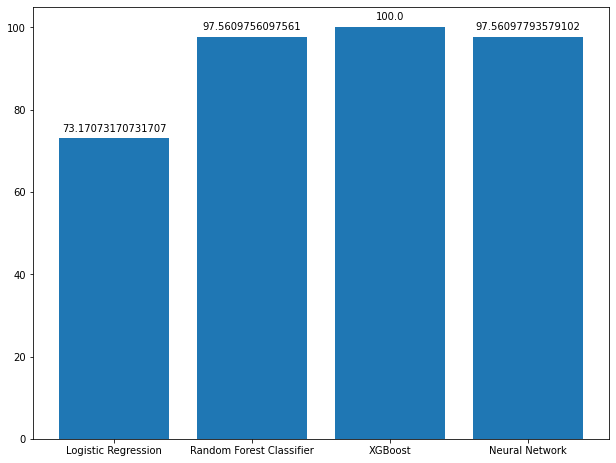

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])

# langs = ['C', 'C++', 'Java', 'Python', 'PHP']
# students = [23,17,35,29,12]

x = ['Logistic Regression', 'Random Forest Classifier', 'XGBoost', 'Neural Network']
y = [acc_log_reg, acc_rf_classifier, acc_XGB_classifier, acc_nn]
# y = [acc_log_reg, 10, acc_XGB_classifier, acc_nn]

ax.bar(x, y)

# ax = result.plot(kind='bar', figsize=(15,4), width=0.8, color=colors_list, edgecolor=None)

#################################################################

for p in ax.patches:
#     print(p)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

#################################################################

plt.show()